In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('advertising.csv',index_col=False)


In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.shape

(200, 4)

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.select_dtypes('number').std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.283892
dtype: float64

# Univariate Analysis

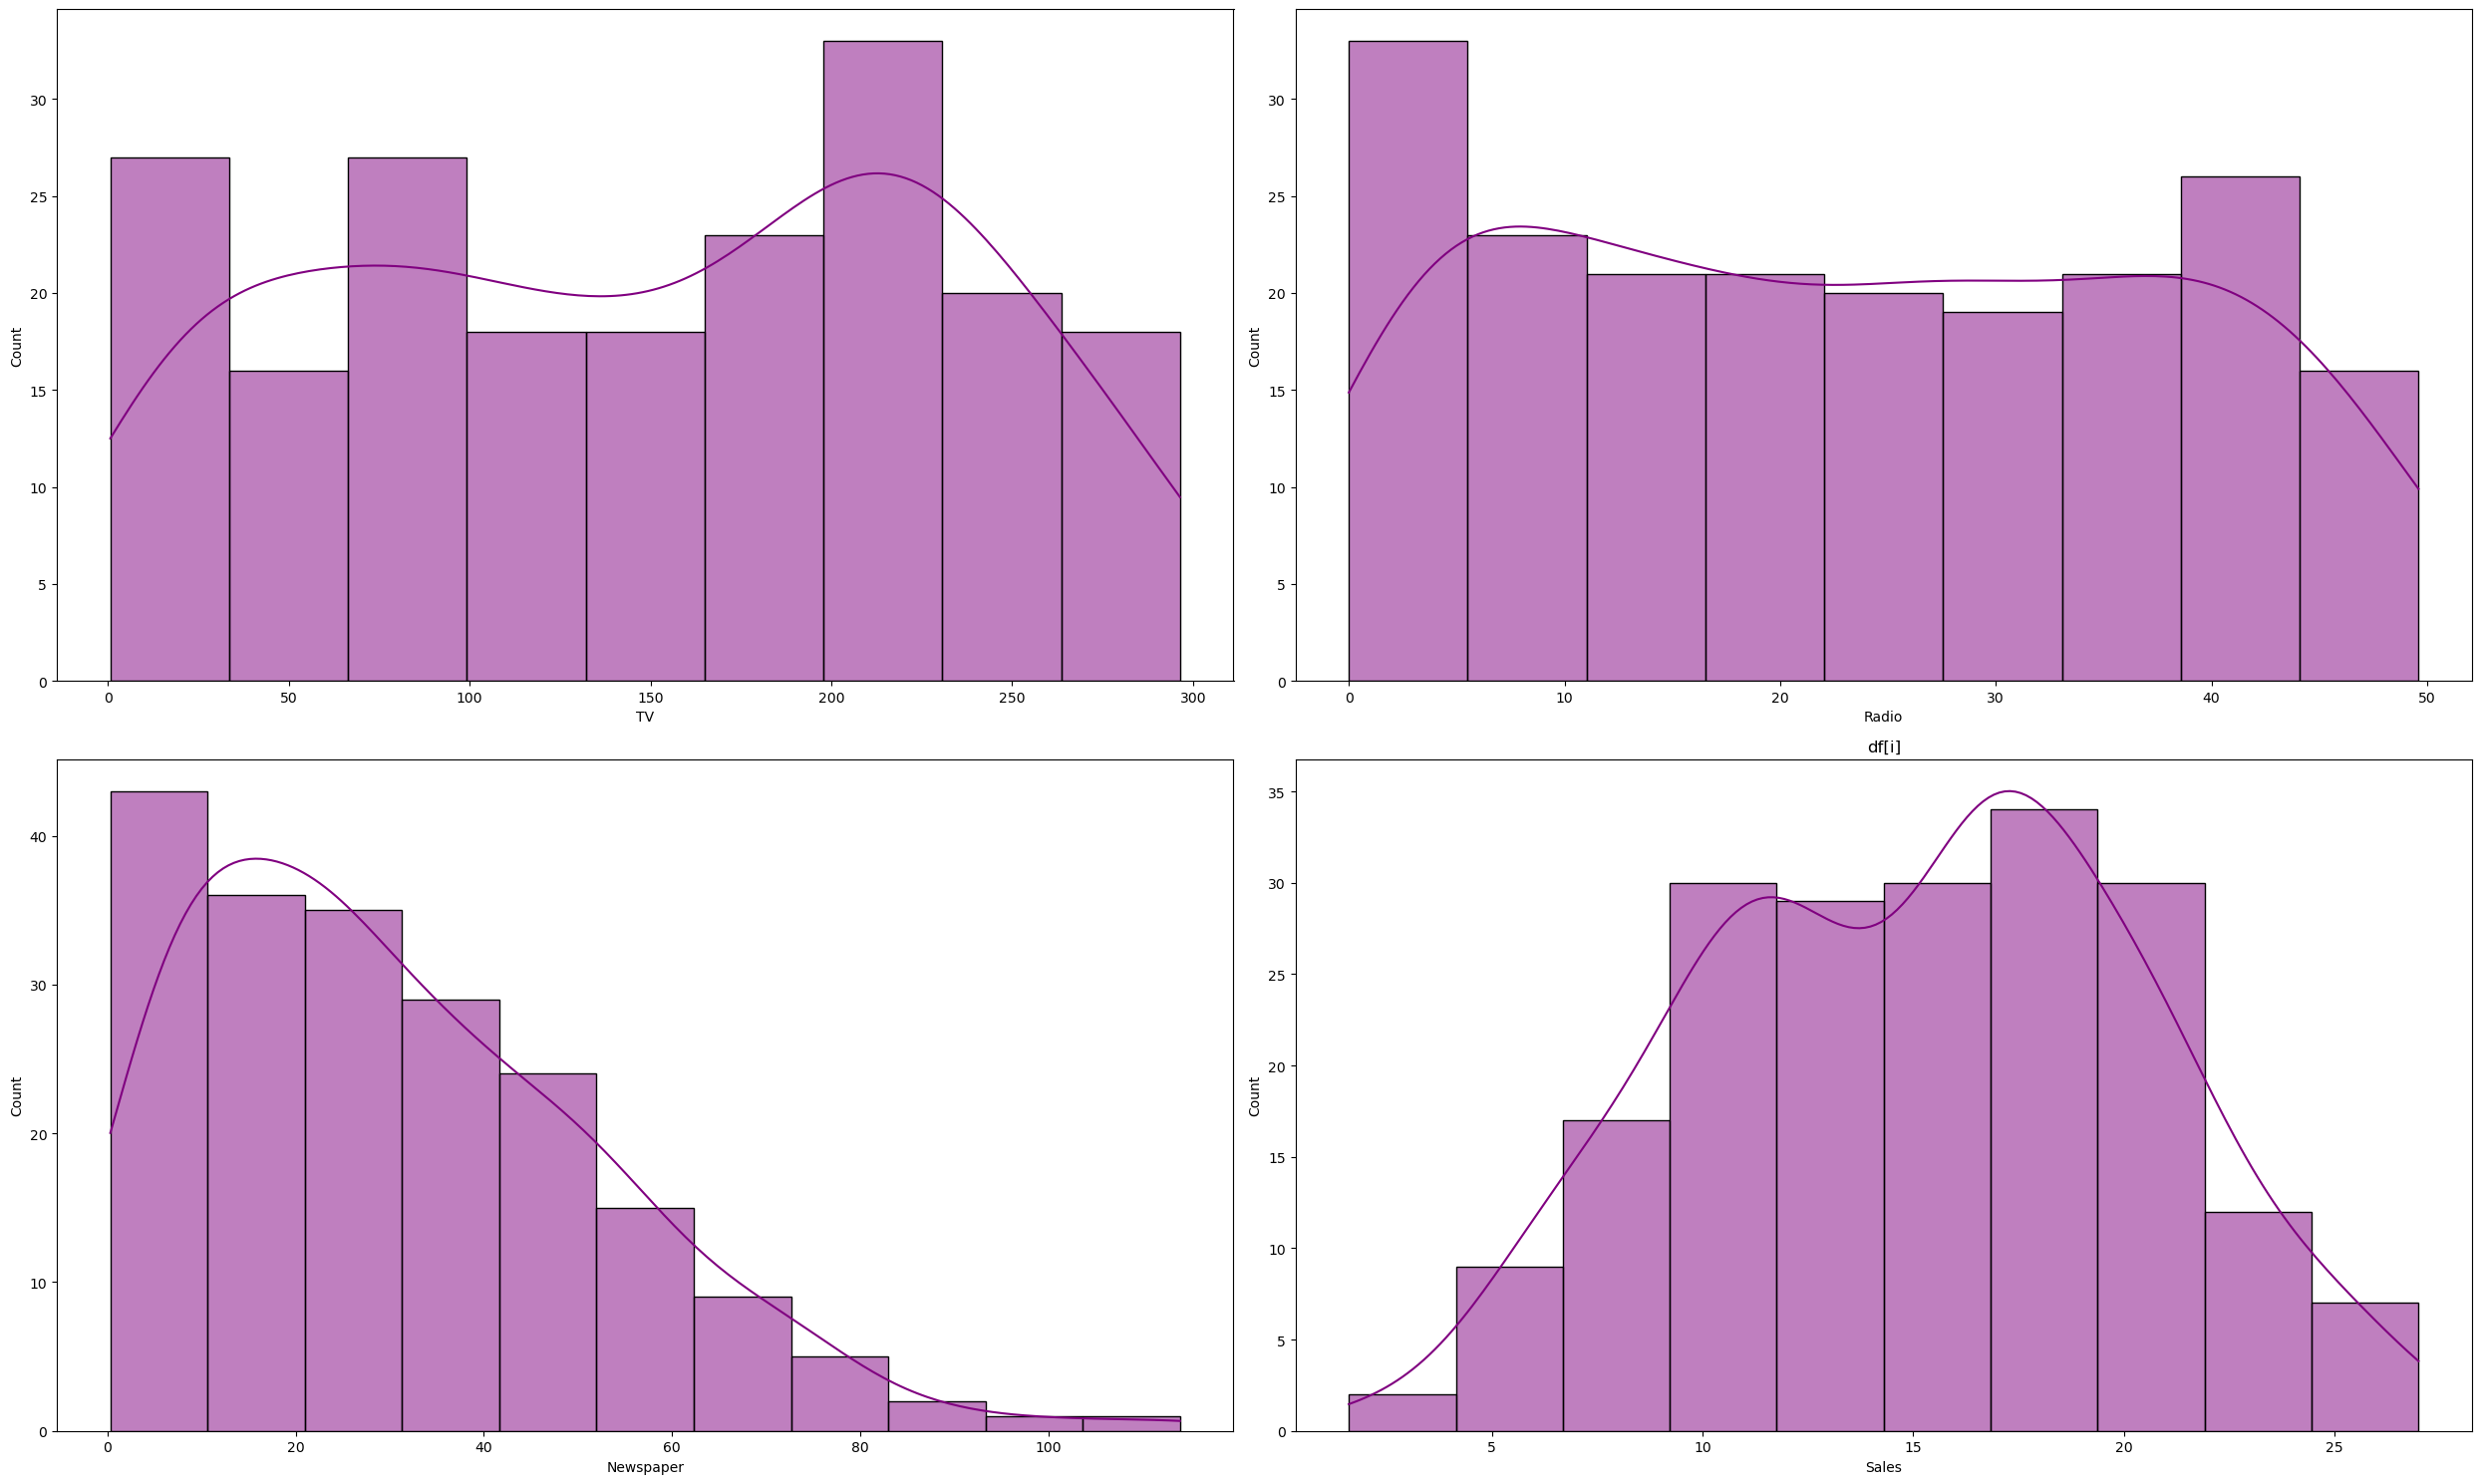

In [10]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(df.columns, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True,color='purple')
    plt.title('df[i]')

plt.tight_layout()
plt.show()

In [11]:
#independent variables are not normally distributed

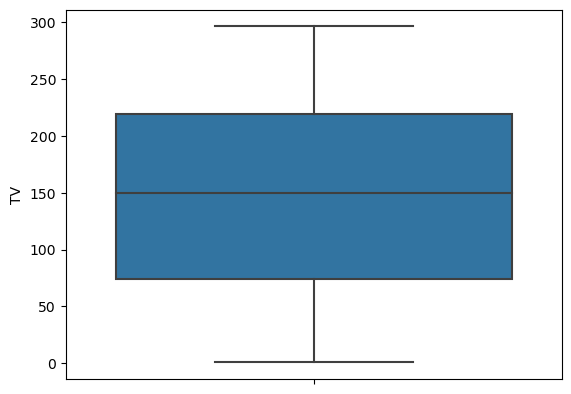

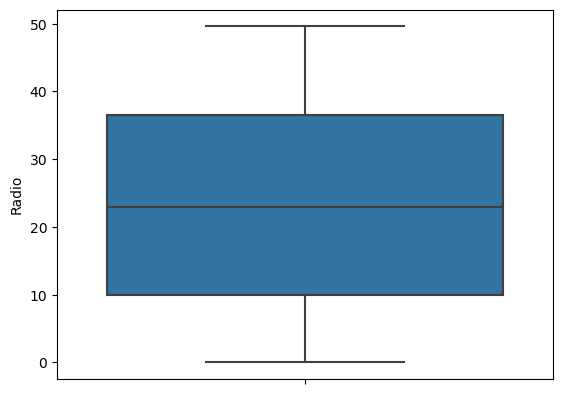

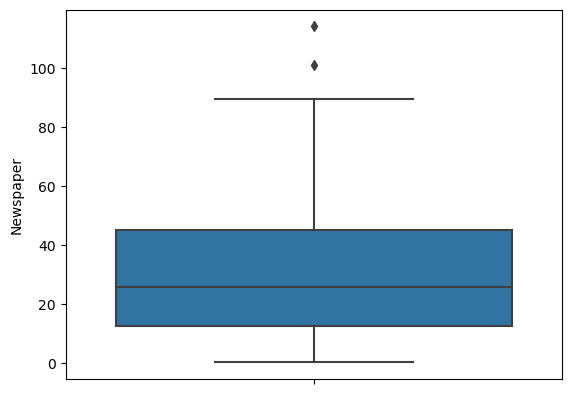

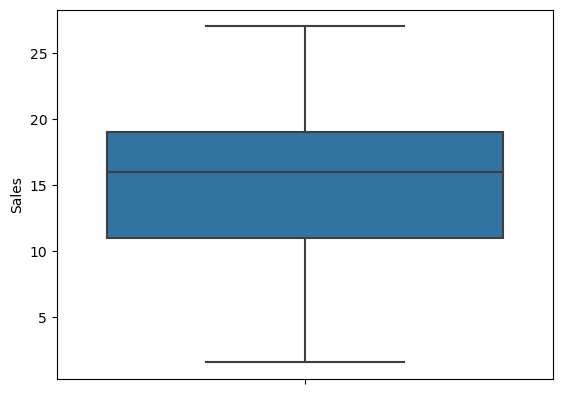

In [12]:
for i in df.columns:
    sns.boxplot(y=df[i])
    plt.show()

In [13]:
#treating outliers

In [14]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [15]:
df=df[~((df<(q1-(1.5*iqr))) | (df>(q3+1.5*iqr))).any(axis=1)]

# Bivariate Analysis

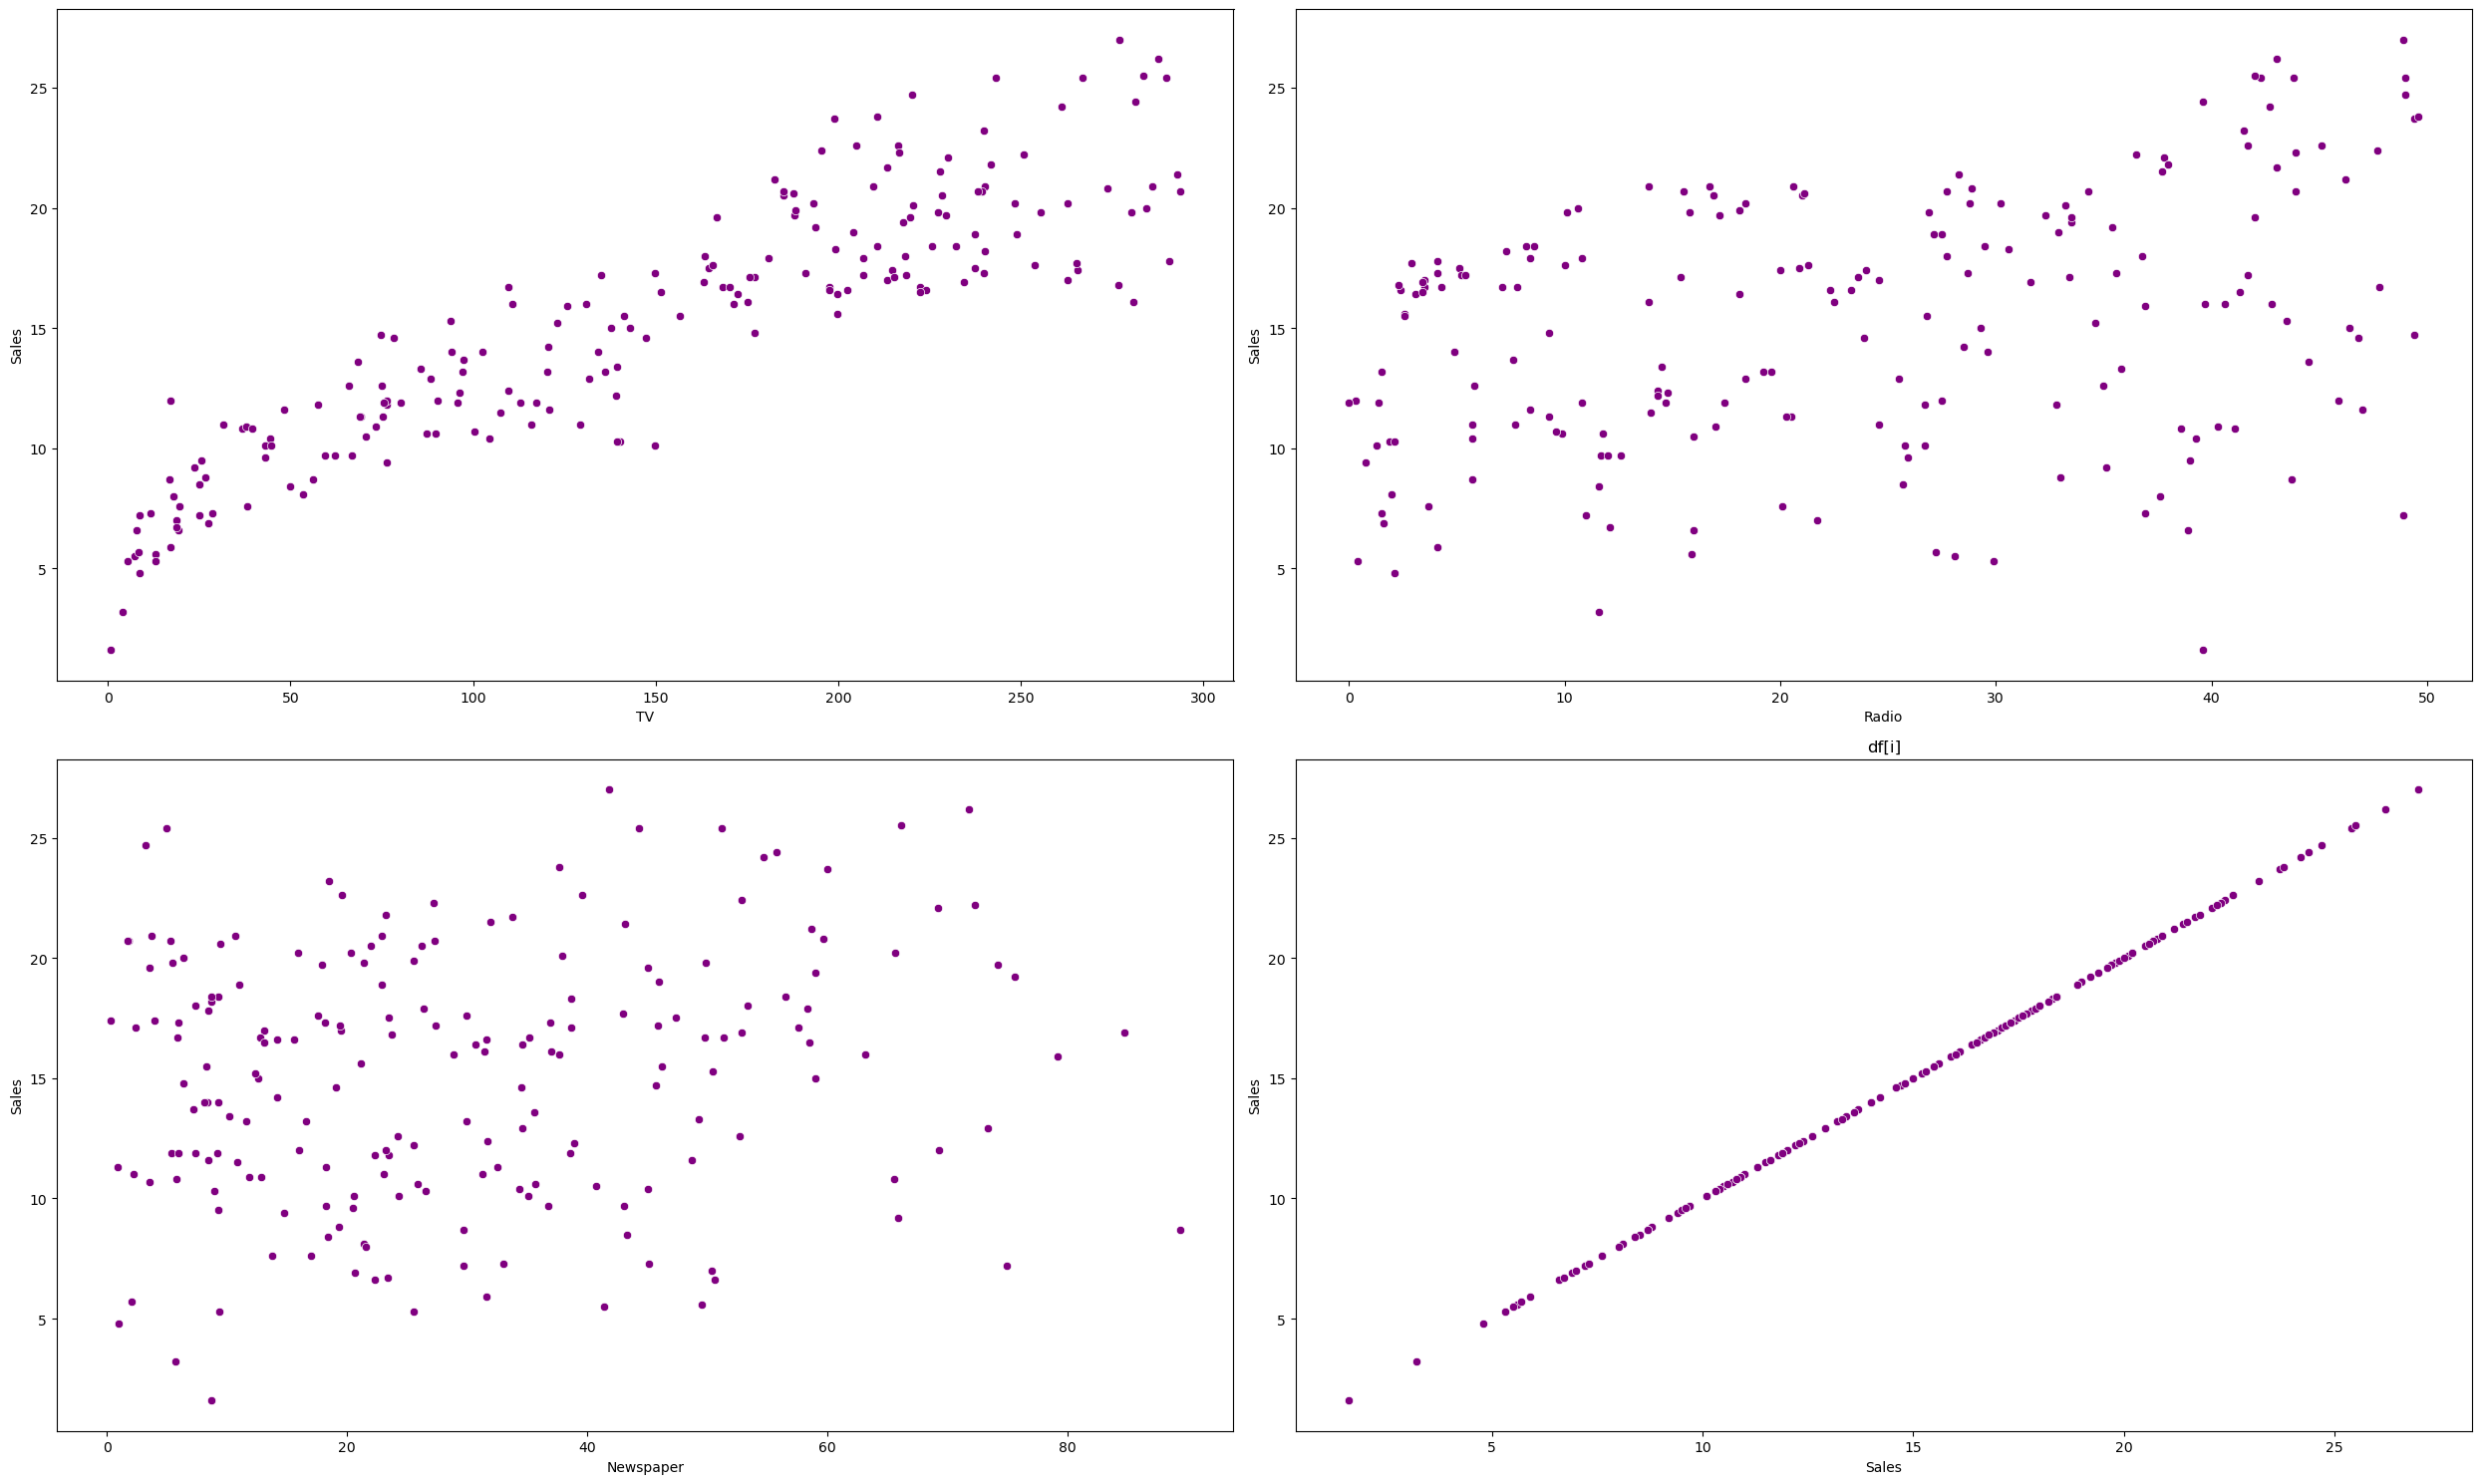

In [16]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(df.columns, ax.flatten()):
    sns.scatterplot(x=df[i],y=df['Sales'], ax=subplot,color='purple')
    plt.title('df[i]')

plt.tight_layout()
plt.show()

In [17]:
#'TV' has high correlation with 'sales'

# Multivariable Analysis

<Axes: >

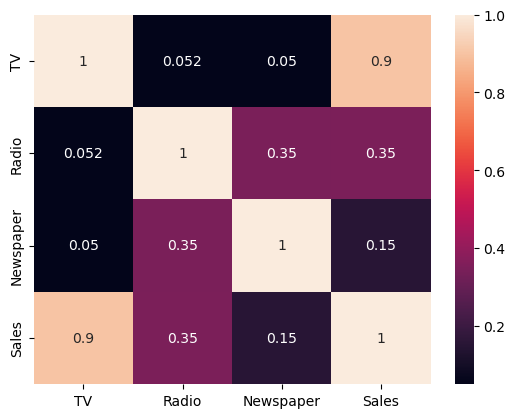

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
#'TV' has high correlation with target variable 'sales'

# Model Building

In [20]:
import statsmodels.api as sma
from sklearn.model_selection import train_test_split

In [21]:
x=df[['TV','Radio','Newspaper']]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
x_c=sma.add_constant(x)

In [23]:
y=df['Sales']

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x_c,y,test_size=.2,random_state=1)

In [25]:
xtrain

,const,TV,Radio,Newspaper
109,1.0,255.4,26.9,5.5
108,1.0,13.1,0.4,25.6
57,1.0,136.2,19.2,16.6
14,1.0,204.1,32.9,46.0
115,1.0,75.1,35.0,52.7
...,...,...,...,...
135,1.0,48.3,47.0,8.5
139,1.0,184.9,43.9,1.7
73,1.0,129.4,5.7,31.3
142,1.0,220.5,33.2,37.9


In [26]:
ytrain.shape

(158,)

In [27]:
xtest.shape

(40, 4)

In [28]:
ytest.shape

(40,)

In [29]:
model_stats=sma.OLS(ytrain,xtrain).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     523.6
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.54e-80
Time:                        10:10:52   Log-Likelihood:                -297.19
No. Observations:                 158   AIC:                             602.4
Df Residuals:                     154   BIC:                             614.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4991      0.336     13.398      0.000       3.836       5.162
TV             0.0567      0.002     37.347      0.000       0.054       0.060
Radio          0.1052      0.009     11.464      0.000       0.087       0.123
Newspaper     -0.0019      0.006     -0.287      0.774      -0.015       0.011
==============================================================================
Omnibus:                       15.009   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.550
Skew:                          -0.425   Prob(JB):                     6.32e-07
Kurtosis:                       4.901   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#since there are variables which is not normally distributed, we transform the data

In [31]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PowerTransformer

In [32]:
power_transformer = PowerTransformer()
X = pd.DataFrame(power_transformer.fit_transform(x),columns=x.columns)

In [33]:
X

,TV,Radio,Newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1)

In [35]:
model_lr=LinearRegression().fit(xtrain,ytrain)

pred_train=model_lr.predict(xtrain)
pred_test=model_lr.predict(xtest)

In [36]:
model_lr.score(xtrain,ytrain),model_lr.score(xtest,ytest)

(0.9221385178478366, 0.8614625609394814)

In [37]:
mean_squared_error(ytest,model_lr.predict(xtest),squared=False),mean_squared_error(ytrain,model_lr.predict(xtrain),squared=False)

(1.8411961712647418, 1.4821970088218084)

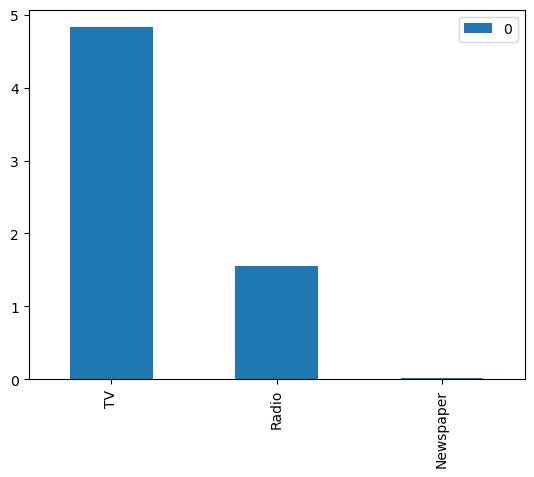

In [38]:
pd.DataFrame(model_lr.coef_,xtrain.columns).plot(kind='bar')
plt.show()

In [39]:
lasso=Lasso()
ridge=Ridge()
enet=ElasticNet()

In [40]:
ridge_1a=Ridge(alpha=1,max_iter=500)
ridge_1a.fit(xtrain,ytrain)

Ridge(alpha=1, max_iter=500)

In [41]:
mean_squared_error(squared=False,y_true=ytrain,y_pred=ridge_1a.predict(xtrain)),mean_squared_error(squared=False,y_true=ytest,y_pred=ridge_1a.predict(xtest))

(1.4825435291323281, 1.8302039784167539)

In [42]:
ridge_2a=Ridge(alpha=2,max_iter=500)
ridge_2a.fit(xtrain,ytrain)

Ridge(alpha=2, max_iter=500)

In [43]:
perf_score = pd.DataFrame(columns=['Model', 'Alpha', 'L1_Ratio','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(xtrain,ytrain)

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)

In [44]:
def update_performance (name, model, alpha = '-', l1_ratio = '-' ):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    'Alpha'          : alpha,
                                    'L1_Ratio'       : l1_ratio,
                                    'R2_Train'       : per_measures(model)[0],
                                    'R2_Test'        : per_measures(model)[1],
                                    'RMSE Train'     : per_measures(model)[2],
                                    'RMSE TEST'      : per_measures(model)[3],
                                    'MAPE'           : per_measures(model)[4]
                                    },
                                   ignore_index = True)

In [45]:
update_performance(name='linear regression',model=model_lr)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302


In [46]:
update_performance(name='ridge', model=ridge_1a, alpha=1)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069


In [47]:
update_performance(name='ridge', model=ridge_2a, alpha=2)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228


In [48]:
lasso=Lasso(alpha=0.01,max_iter=500)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.01, max_iter=500)

In [49]:
update_performance(name='lasso', model=lasso, alpha=0.01)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815


In [50]:
lasso=Lasso(alpha=0.1,max_iter=500)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.1, max_iter=500)

In [51]:
update_performance(name='lasso', model=lasso, alpha=0.1)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815
4,lasso,0.1,-,0.921426,0.864847,1.488964,1.818569,9.935331


In [52]:
lasso=Lasso(alpha=0.005,max_iter=500)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.005, max_iter=500)

In [53]:
update_performance(name='lasso', model=lasso, alpha=0.005)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815
4,lasso,0.1,-,0.921426,0.864847,1.488964,1.818569,9.935331
5,lasso,0.005,-,0.922136,0.861636,1.482217,1.840043,10.039562


In [54]:
lasso=Lasso(alpha=0.001,max_iter=500)
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.001, max_iter=500)

In [55]:
update_performance(name='lasso', model=lasso, alpha=0.001)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815
4,lasso,0.1,-,0.921426,0.864847,1.488964,1.818569,9.935331
5,lasso,0.005,-,0.922136,0.861636,1.482217,1.840043,10.039562
6,lasso,0.001,-,0.922138,0.861498,1.482198,1.840963,10.042559


In [56]:
enet=ElasticNet(alpha=0.1,l1_ratio=0.01,max_iter=500)
enet.fit(xtrain,ytrain)

ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500)

In [57]:
update_performance(name='enet', model=enet, alpha=0.1,l1_ratio=0.01)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815
4,lasso,0.1,-,0.921426,0.864847,1.488964,1.818569,9.935331
5,lasso,0.005,-,0.922136,0.861636,1.482217,1.840043,10.039562
6,lasso,0.001,-,0.922138,0.861498,1.482198,1.840963,10.042559
7,enet,0.1,0.01,0.914670,0.875959,1.551659,1.742207,9.820449


In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
ridge=Ridge()
params=({'alpha':[0.1,0.5,0.6,0.9,0.01,0.02,0.001,0.002,0.003,0.3,1,2,3,4,5,10,15,20]})

In [60]:
grid_ridge=GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=5)

In [61]:
grid_ridge.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 0.6, 0.9, 0.01, 0.02, 0.001, 0.002,
                                   0.003, 0.3, 1, 2, 3, 4, 5, 10, 15, 20]},
             scoring='r2')

In [62]:
update_performance(name='grid_ridge', model=grid_ridge, alpha=20)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815
4,lasso,0.1,-,0.921426,0.864847,1.488964,1.818569,9.935331
5,lasso,0.005,-,0.922136,0.861636,1.482217,1.840043,10.039562
6,lasso,0.001,-,0.922138,0.861498,1.482198,1.840963,10.042559
7,enet,0.1,0.01,0.914670,0.875959,1.551659,1.742207,9.820449
8,grid_ridge,20,-,0.922139,0.861497,1.482197,1.840969,10.042754


In [63]:
lasso=Lasso()
params=({'alpha':[0.1,0.5,0.6,0.9,0.01,0.02,0.001,0.002,0.003,0.3,1,2,3,4,5,10,15,20]})
grid_lasso=GridSearchCV(estimator=lasso,param_grid=params,scoring='r2',cv=5)

In [64]:
grid_lasso.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 0.6, 0.9, 0.01, 0.02, 0.001, 0.002,
                                   0.003, 0.3, 1, 2, 3, 4, 5, 10, 15, 20]},
             scoring='r2')

In [65]:
update_performance(name='grid_lasso', model=grid_lasso, alpha=0.05)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815
4,lasso,0.1,-,0.921426,0.864847,1.488964,1.818569,9.935331
5,lasso,0.005,-,0.922136,0.861636,1.482217,1.840043,10.039562
6,lasso,0.001,-,0.922138,0.861498,1.482198,1.840963,10.042559
7,enet,0.1,0.01,0.914670,0.875959,1.551659,1.742207,9.820449
8,grid_ridge,20,-,0.922139,0.861497,1.482197,1.840969,10.042754
9,grid_lasso,0.05,-,0.921426,0.864847,1.488964,1.818569,9.935331


In [66]:
enet=ElasticNet()
params=({'l1_ratio':[0.1,0.01,0.001,0.2,0.3,0.5,0.7,0.8,0.9,0.25],
         'alpha'   :[0.1,0.2,0.9,1,2,3,4,5,6,7,8,9,10,12,15,20]
        })

grid_enet=GridSearchCV(estimator=enet,
                       param_grid=params,
                       scoring='r2',
                       cv=5)

In [67]:
grid_enet.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                   12, 15, 20],
                         'l1_ratio': [0.1, 0.01, 0.001, 0.2, 0.3, 0.5, 0.7, 0.8,
                                      0.9, 0.25]},
             scoring='r2')

In [68]:
update_performance(name='grid_enet', model=grid_enet, alpha=0.05)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815
4,lasso,0.1,-,0.921426,0.864847,1.488964,1.818569,9.935331
5,lasso,0.005,-,0.922136,0.861636,1.482217,1.840043,10.039562
6,lasso,0.001,-,0.922138,0.861498,1.482198,1.840963,10.042559
7,enet,0.1,0.01,0.914670,0.875959,1.551659,1.742207,9.820449
8,grid_ridge,20,-,0.922139,0.861497,1.482197,1.840969,10.042754
9,grid_lasso,0.05,-,0.921426,0.864847,1.488964,1.818569,9.935331


In [69]:
grid_enet.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [70]:
from sklearn.linear_model import SGDRegressor

In [71]:


sgd = SGDRegressor()

sgd.fit(xtrain,ytrain)


update_performance(name = 'Stochastic GD L2', model =sgd, alpha='0.0001-lr',l1_ratio=0.15)

# print the dataframe
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815
4,lasso,0.1,-,0.921426,0.864847,1.488964,1.818569,9.935331
5,lasso,0.005,-,0.922136,0.861636,1.482217,1.840043,10.039562
6,lasso,0.001,-,0.922138,0.861498,1.482198,1.840963,10.042559
7,enet,0.1,0.01,0.914670,0.875959,1.551659,1.742207,9.820449
8,grid_ridge,20,-,0.922139,0.861497,1.482197,1.840969,10.042754
9,grid_lasso,0.05,-,0.921426,0.864847,1.488964,1.818569,9.935331


In [72]:
sgd.fit(xtrain,ytrain)


update_performance(name = 'Stochastic GD L2', model =sgd, alpha='0.0001-lr',l1_ratio=0.15)

# print the dataframe
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,linear regression,-,-,0.922139,0.861463,1.482197,1.841196,10.043302
1,ridge,1,-,0.922102,0.863112,1.482544,1.830204,10.016069
2,ridge,2,-,0.921995,0.864646,1.483565,1.819919,9.989228
3,lasso,0.01,-,0.922130,0.861805,1.482278,1.838920,10.035815
4,lasso,0.1,-,0.921426,0.864847,1.488964,1.818569,9.935331
5,lasso,0.005,-,0.922136,0.861636,1.482217,1.840043,10.039562
6,lasso,0.001,-,0.922138,0.861498,1.482198,1.840963,10.042559
7,enet,0.1,0.01,0.914670,0.875959,1.551659,1.742207,9.820449
8,grid_ridge,20,-,0.922139,0.861497,1.482197,1.840969,10.042754
9,grid_lasso,0.05,-,0.921426,0.864847,1.488964,1.818569,9.935331


In [ ]:
#grid elastic-net model is working best with high R square values and low rmse and mape values